### Classifying Habitable and Non-Habitable Exoplanets

This notebook is dedicated to exploring the HWC data (as of 21 Feb 2025) from https://phl.upr.edu/hwc/data.

Reference: Machine Learning for Physics and Astronomy | Lecture Notebook with Copyright: Viviana Acquaviva (2023)

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import seaborn as sns

##### 1. Data exploration

In [4]:
# Read the data in a data frame
csv_path = 'datasets\hwc.csv'

df = pd.read_csv(csv_path)
df.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre


In [5]:
# Visualize the name of the columns (available features)
df.columns

Index(['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR', 'P_UPDATE',
       'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_MASS_LIMIT',
       'P_MASS_ORIGIN',
       ...
       'S_ABIO_ZONE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON',
       'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object', length=118)

In [6]:
# Visualize some statistics
df.describe()

,P_YEAR,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_RADIUS_LIMIT,P_PERIOD,...,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
count,5599.000000,5592.000000,2506.000000,2506.000000,5599.000000,5592.000000,3847.000000,3847.000000,5599.000000,5.350000e+03,...,5366.000000,5366.000000,5366.000000,5366.000000,5.376000e+03,5595.000000,5599.000000,5599.000000,5599.000000,5358.000000
mean,2016.188962,442.521283,-127.777520,174.465166,0.022861,5.715494,-0.432279,0.544259,-0.000714,7.994082e+04,...,2.301153,1.239781,2.301153,3.596167,1.014471e+35,0.425790,0.047151,0.033577,0.019825,0.257089
std,4.527714,2369.505048,383.670428,625.151645,0.160982,5.331450,0.960669,1.568228,0.026721,5.498596e+06,...,4.587874,2.390133,4.587874,6.741964,5.259131e+36,0.077064,0.211981,0.180155,0.184617,0.131622
min,1992.000000,0.020000,-6038.739700,0.000000,-1.000000,0.310000,-32.506000,0.000000,-1.000000,9.070629e-02,...,0.001910,0.000911,0.001910,0.002434,4.356319e-05,0.029269,0.000000,0.000000,0.000000,0.023896
25%,2014.000000,4.040000,-73.100900,2.712500,0.000000,1.780000,-0.480000,0.130000,0.000000,4.465382e+00,...,1.060687,0.568834,1.060687,1.615711,4.781093e-01,0.391256,0.000000,0.000000,0.000000,0.186192
50%,2016.000000,8.750000,-19.069800,20.000000,0.000000,2.780000,-0.220000,0.280000,0.000000,1.156951e+01,...,1.561742,0.854147,1.561742,2.502441,1.361846e+00,0.443760,0.000000,0.000000,0.000000,0.268055
75%,2020.000000,162.092490,-2.542630,85.813670,0.000000,11.900000,-0.110000,0.581500,0.000000,4.150555e+01,...,2.364700,1.299225,2.364700,3.873593,2.556535e+00,0.470516,0.000000,0.000000,0.000000,0.301299
max,2024.000000,89700.000000,0.000000,12395.308000,1.000000,77.342000,0.000000,68.910000,0.000000,4.020000e+08,...,120.348830,67.331558,120.348830,214.468620,2.726899e+38,1.003328,1.000000,1.000000,2.000000,0.968362


In [7]:
# Pick a specific column (or feature)
df.groupby('P_HABITABLE').count()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
P_HABITABLE,,,,,,,,,,,,,,,,,,,,,
0,5529,5529,5529,5529,5529,5522,2471,2471,5529,5529,...,5296,5306,5525,5529,5529,5295,5288,5529,5529,5529
1,29,29,29,29,29,29,16,16,29,29,...,29,29,29,29,29,29,29,29,29,29
2,41,41,41,41,41,41,19,19,41,41,...,41,41,41,41,41,41,41,41,41,41


In our present dataset, "P_HABITABLE" is the classification labels:
- 0: not habitable
- 1: conservatively habitable
- 2: optimistically habitable

To have a binary classification problem, we consider potentially habitable planets with the flag P_HABITABLE > 0.
That is, we group data with P_HABITABLE labels 1 and 2.

In [8]:
# Remove the old tag for habitability (axis=1 means we drop the whole column, axis=0 means dropping index/rows)
bindf = df.drop('P_HABITABLE', axis=1)
bindf.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,NaN,0.214133,0,0,NaN,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.437046,2.097783,0.316980,0,0,Hot,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,2.827247,1.756317,0.459559,0,0,Hot,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,1.476943,0.568374,0.443760,0,0,Hot,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,1.759397,0.768502,0.386150,0,0,Hot,0.276721,Lyra,Lyr,Lyre


In [9]:
# Create a new data frame
bindf['P_HABITABLE'] = (np.logical_or((df.P_HABITABLE == 1), (df.P_HABITABLE == 2)))

# Recast the column as integer instead of being logical "true" or "false"
bindf['P_HABITABLE'] = bindf['P_HABITABLE'].astype(int)

bindf.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_HABITABLE
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,0.214133,0,0,NaN,NaN,Scorpius,Sco,Scorpion,0
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.097783,0.316980,0,0,Hot,0.272032,Cygnus,Cyg,Swan,0
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0.254763,Lyra,Lyr,Lyre,0
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0.193906,Pisces,Psc,Fishes,0
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0.276721,Lyra,Lyr,Lyre,0


In [10]:
# Inspect available features
print(bindf[:0])

Empty DataFrame
Columns: [P_NAME, P_DETECTION, P_DISCOVERY_FACILITY, P_YEAR, P_UPDATE, P_MASS, P_MASS_ERROR_MIN, P_MASS_ERROR_MAX, P_MASS_LIMIT, P_MASS_ORIGIN, P_RADIUS, P_RADIUS_ERROR_MIN, P_RADIUS_ERROR_MAX, P_RADIUS_LIMIT, P_PERIOD, P_PERIOD_ERROR_MIN, P_PERIOD_ERROR_MAX, P_PERIOD_LIMIT, P_SEMI_MAJOR_AXIS, P_SEMI_MAJOR_AXIS_ERROR_MIN, P_SEMI_MAJOR_AXIS_ERROR_MAX, P_SEMI_MAJOR_AXIS_LIMIT, P_ECCENTRICITY, P_ECCENTRICITY_ERROR_MIN, P_ECCENTRICITY_ERROR_MAX, P_ECCENTRICITY_LIMIT, P_INCLINATION, P_INCLINATION_ERROR_MIN, P_INCLINATION_ERROR_MAX, P_INCLINATION_LIMIT, P_OMEGA, P_OMEGA_ERROR_MIN, P_OMEGA_ERROR_MAX, P_OMEGA_LIMIT, S_NAME, S_NAME_HD, S_NAME_HIP, S_TYPE, S_RA, S_DEC, S_RA_STR, S_DEC_STR, S_MAG, S_MAG_ERROR_MIN, S_MAG_ERROR_MAX, S_DISTANCE, S_DISTANCE_ERROR_MIN, S_DISTANCE_ERROR_MAX, S_TEMPERATURE, S_TEMPERATURE_ERROR_MIN, S_TEMPERATURE_ERROR_MAX, S_TEMPERATURE_LIMIT, S_MASS, S_MASS_ERROR_MIN, S_MASS_ERROR_MAX, S_MASS_LIMIT, S_RADIUS, S_RADIUS_ERROR_MIN, S_RADIUS_ERROR_MAX, S_RA

We'll use the same features presented in the lecture notebook of Viviana Acquaviva Copyright (2023).

Here is a list of some features available in the dataset:
- S_MAG: star magnitude
- S_DISTANCE: star distance (in parsec)
- S_METALLICITY: star metallicity (in dex)
- S_MASS: star mass (in solar units)
- S_RADIUS: star radius (in solar units)
- S_AGE: star age (Gy)
- S_TEMPERATURE: star effective temperature (in K)
- S_LOG_G: star log (in g)
- P_DISTANCE: planet mean distance from the star (in AU)
- P_FLUX: planet mean stellar flux (in earth units)
- P_PERIOD: planet period (in days)

For this tutorial, we'll only use the three features selected from the reference notebook.

In [11]:
final_features = bindf[['S_MASS', 'P_PERIOD', 'P_DISTANCE']]
targets = bindf.P_HABITABLE

final_features.head()
final_features.shape


(5599, 3)

Notice that there is a missing value for P_PERIOD. (We're lucky enough to notice these immediately)

We now check further if the other selected features contains missing values.

In [12]:
final_features.isnull().values.any()

True

For now, we will just discard this missing values (not ideal, but we'll proceed with this approach).

In [13]:
final_features = final_features.dropna(axis=0)

Let's see if it works.

In [14]:
final_features.head()
final_features.shape

(5350, 3)

In [15]:
final_features.isnull().values.any()

False

After cleaning the missing values, we proceed with checking for outliers.

Method 1: Let's use histograms

(array([1.700e+01, 5.800e+01, 7.400e+01, 9.900e+01, 1.950e+02, 2.740e+02,
        3.840e+02, 8.860e+02, 1.109e+03, 9.740e+02, 5.740e+02, 2.680e+02,
        1.460e+02, 1.080e+02, 4.100e+01, 3.100e+01, 3.200e+01, 2.100e+01,
        1.100e+01, 9.000e+00, 6.000e+00, 2.000e+00, 5.000e+00, 6.000e+00,
        3.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

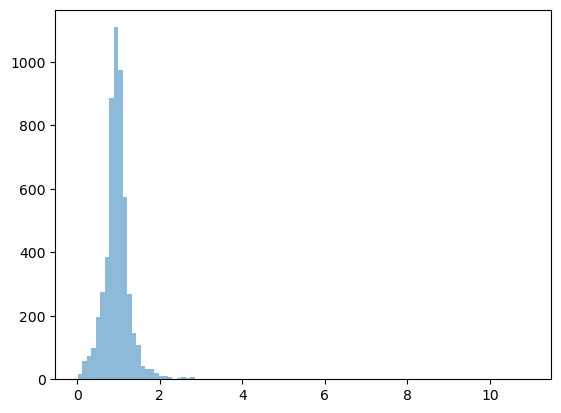

In [16]:
plt.hist(final_features.iloc[:,0], bins=100, alpha=0.5)

Notice that the range of x values in the histogram is unnecessarily large. This may indicate that there are outliers.

Method 2: Check for the difference between mean and median

In [17]:
final_features.describe()

,S_MASS,P_PERIOD,P_DISTANCE
count,5350.000000,5.350000e+03,5350.000000
mean,0.967725,7.994082e+04,2.298436
std,0.394993,5.498596e+06,103.218178
min,0.010000,9.070629e-02,0.004408
25%,0.810000,4.465382e+00,0.051900
50%,0.950000,1.156951e+01,0.096550
75%,1.100000,4.150555e+01,0.232000
max,10.940000,4.020000e+08,7506.000000


For S_MASS, the mean 0.967725 is not quite far from 0.950000. However, for P_PERIOD (orbital period) and P_DISTANCE (orbital distance), the diffence between the mean and 50th percentile values are quite pronounced.

To further clean our data, we eliminate objects with more than 5 sigma outlier in any column. This is not an ideal approach as we simply remove data beyond 5 standard deviation away from the mean, but we'll proceed with this approach.

In [18]:
final_features = final_features[(np.abs(stats.zscore(final_features)) < 5).all(axis=1)]

In [19]:
# Sync targets with the cleaned features
targets = targets[final_features.index]

Let's see what the adjustment does to the data statistics.

(array([  4.,   0.,   9.,  15.,  12.,  12.,  16.,  11.,  11.,  26.,  12.,
         32.,  17.,  28.,  36.,  20.,  42.,  62.,  54.,  56.,  77.,  41.,
        101.,  77.,  90.,  91.,  90., 192., 254., 241., 257., 144., 296.,
        388., 281., 296., 191., 245., 242., 168., 162., 138., 106.,  75.,
         76.,  78.,  57.,  28.,  29.,  57.,  24.,  39.,  12.,  29.,  22.,
         10.,  11.,   9.,  13.,   8.,  11.,   6.,  11.,   8.,   6.,   7.,
          4.,  12.,   3.,   2.,   4.,   3.,   2.,   2.,   5.,   2.,   2.,
          1.,   1.,   1.,   2.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,
          2.,   3.,   1.,   1.,   3.,   1.,   0.,   1.,   1.,   0.,   3.,
          4.]),
 array([0.01  , 0.0381, 0.0662, 0.0943, 0.1224, 0.1505, 0.1786, 0.2067,
        0.2348, 0.2629, 0.291 , 0.3191, 0.3472, 0.3753, 0.4034, 0.4315,
        0.4596, 0.4877, 0.5158, 0.5439, 0.572 , 0.6001, 0.6282, 0.6563,
        0.6844, 0.7125, 0.7406, 0.7687, 0.7968, 0.8249, 0.853 , 0.8811,
        0.9092, 0.9373, 0.9654

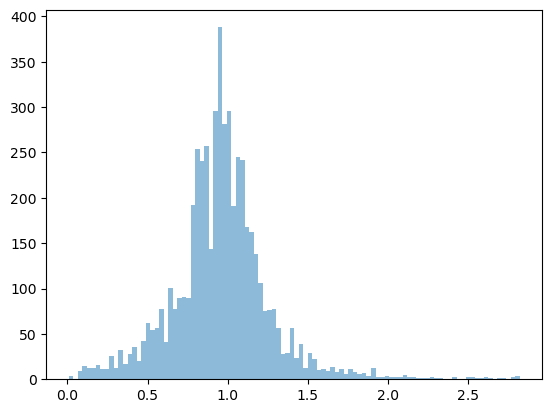

In [20]:
plt.hist(final_features.iloc[:,0], bins=100, alpha=0.5)

In [21]:
final_features.describe()

,S_MASS,P_PERIOD,P_DISTANCE
count,5339.000000,5.339000e+03,5339.000000
mean,0.958412,4.474116e+03,0.781645
std,0.310071,1.684960e+05,7.652001
min,0.010000,9.070629e-02,0.004408
25%,0.810000,4.457790e+00,0.051795
50%,0.950000,1.154182e+01,0.096255
75%,1.100000,4.099921e+01,0.229924
max,2.820000,8.040000e+06,430.920000


The data somehow looks "clean" now. Let's proceed with resetting the index of the data frame.

In [22]:
final_features = final_features.reset_index(drop=True)

final_features.head()

,S_MASS,P_PERIOD,P_DISTANCE
0,1.10,31.884000,0.1994
1,0.98,6.883376,0.0678
2,0.89,1.921036,0.0291
3,0.87,11.119907,0.0911
4,0.68,7.493134,0.0657


In [23]:
targets = targets.reset_index(drop=True)

targets.head()

0    0
1    0
2    0
3    0
4    0
Name: P_HABITABLE, dtype: int32

In [24]:
targets.shape

(5339,)

Based on the current shape of the labels, 11 "outliers" were removed from the dataset.

To further explore the data, we check for potential imbalance issues.

In [25]:
# Show the distribution of the classes
np.bincount(targets)

array([5269,   70], dtype=int64)

Notice that our data is extremely imbalanced. We need to consider this in training the model.

The final step for now is to explore the data by class.

In [26]:
# Create a "view" from the data frame by grouping objects/features with labels

pd.concat([final_features, targets], axis=1)

,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,1.10,31.884000,0.199400,0
1,0.98,6.883376,0.067800,0
2,0.89,1.921036,0.029100,0
3,0.87,11.119907,0.091100,0
4,0.68,7.493134,0.065700,0
...,...,...,...,...
5334,0.84,3.770150,0.044721,0
5335,1.21,3999.000000,5.205792,0
5336,1.25,146.050000,0.596704,0
5337,0.99,29.334340,0.180159,0


We examine the statistics of each group/class.

In [27]:
pd.concat([final_features, targets], axis=1).groupby('P_HABITABLE').describe(percentiles=[])

S_MASS                                       P_PERIOD  \
              count      mean       std   min   50%   max    count   
P_HABITABLE                                                          
0            5269.0  0.965409  0.304768  0.01  0.96  2.82   5269.0   
1              70.0  0.431714  0.247650  0.09  0.42  1.04     70.0   

                                                                          \
                    mean            std       min       50%          max   
P_HABITABLE                                                                
0            4532.574018  169610.983874  0.090706  11.33200  8040000.000   
1              73.921945      80.613442  4.049219  36.76998      384.843   

            P_DISTANCE                                                 
                 count      mean       std       min     50%      max  
P_HABITABLE                                                            
0               5269.0  0.788638  7.702383  0.004408  0.0958  430.920  
1                 70.0  0.255224  0.233825  0.022271  0.1647    1.046

We can also visualize the classes.

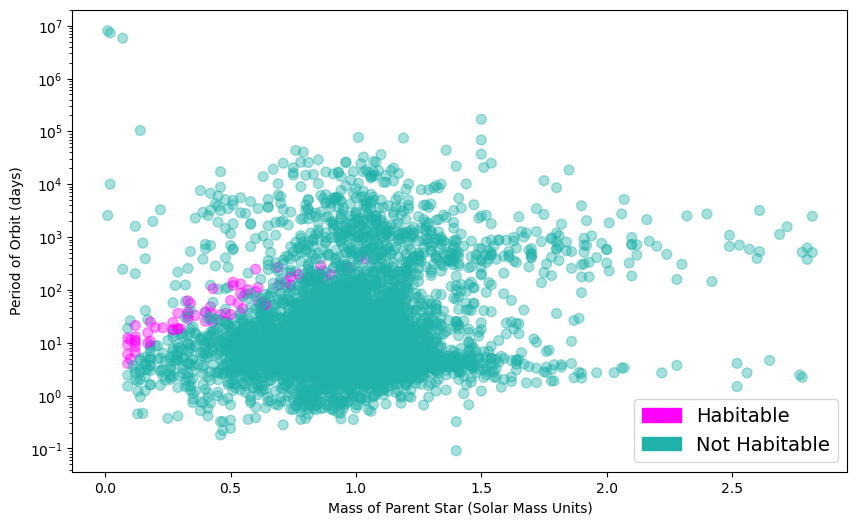

In [35]:
# plotdf = pd.concat([final_features, targets], axis=1)
# sns.pairplot(plotdf, hue='P_HABITABLE')

plt.figure(figsize=(10,6))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])

a = plt.scatter(final_features['S_MASS'], final_features['P_PERIOD'], marker = 'o',\
            c = targets, s = 50, cmap=cmap, label = 'Test', alpha=0.4)

plt.legend();

# a.set_facecolor('none')

plt.yscale('log')
plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');


bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')
magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

ax = plt.gca()
leg = ax.get_legend()

plt.legend(handles=[magentapatch, bluepatch],\
           loc = 'lower right', fontsize = 14);